In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.image as mpimg
from IPython.display import HTML
import glob

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

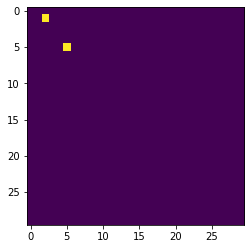

In [9]:
N=30
grid = np.zeros(N*N).reshape(N,N)
grid[1][2] = 1
grid[5][5] = 1
print(grid)
plt.imshow(grid)

In [17]:
N=10
for i in range(1,N+1):
    print(i,i%2)

1 1
2 0
3 1
4 0
5 1
6 0
7 1
8 0
9 1
10 0


## A self-destroying gopser glider gun

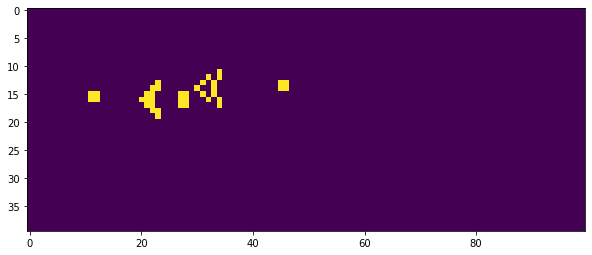

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def addGosperGliderGun(i, j, grid):
    # adds a Gosper Glider Gun with top left cell at (i, j)
    gun = np.zeros(11*38).reshape(11, 38) 
    gun[5][1] = gun[5][2] = 1
    gun[6][1] = gun[6][2] = 1
    gun[3][13] = gun[3][14] = 1
    gun[4][12] = gun[4][16] = 1
    gun[5][11] = gun[5][17] = 1
    gun[6][11] = gun[6][15] = gun[6][17] = gun[6][18] = 1
    gun[7][11] = gun[7][17] = 1
    gun[8][12] = gun[8][16] = 1
    gun[9][13] = gun[9][14] = 1
    gun[1][25] = 1
    gun[2][23] = gun[2][25] = 1
    gun[3][21] = gun[3][22] = 1
    gun[4][21] = gun[4][22] = 1
    gun[5][21] = gun[5][22] = 1
    gun[6][23] = gun[6][25] = 1
    gun[7][25] = 1
    gun[3][35] = gun[3][36] = 1
    gun[4][35] = gun[4][36] = 1
    grid[i:i+11, j:j+38] = gun 
    return grid

def update(frameNum,img,grid,N,M):
    # update 2D grid
    # first, make a copy of the old grid
    newgrid = grid.copy()
    for i in range(N):
        for j in range(M):
            total = int((grid[i, (j-1)%M] + grid[i, (j+1)%M] + 
                         grid[(i-1)%N, j] + grid[(i+1)%N, j] + 
                         grid[(i-1)%N, (j-1)%M] + grid[(i-1)%N, (j+1)%M] + 
                         grid[(i+1)%N, (j-1)%M] + grid[(i+1)%N, (j+1)%M]))
            # apply Conway's rules 
            if grid[i,j]  == 1: 
                if (total < 2) or (total > 3): 
                    newgrid[i,j] = 0 
            else: 
                if total == 3: 
                    newgrid[i,j] = 1
    img.set_data(newgrid) 
    grid[:] = newgrid[:] 
    return img,

N         = 40
M         = 100
time_ms   = 100

# initialize grid
grid = np.zeros(N*M).reshape(N, M)
addGosperGliderGun(10,10,grid)

fig, ax = plt.subplots(figsize=(10,5)) 
img = ax.imshow(grid, interpolation='nearest')

ani = animation.FuncAnimation(fig, update, fargs=(img,grid,N,M,), 
                                  frames = 800, 
                                  interval=time_ms) 

In [25]:
HTML(ani.to_jshtml())